Abstract: This program is created to use statistics to analyze the difference in team and league performance in the NHL when a team plays at home versus on the Road. This document serves as both an explanation of the methodology and programming, as well as the analysis of the computed data.

Below are the import statements utilized. The Pandas library is imporant as it allows for use of data frames, series, as well as the statistical functions. The NumPY library allows for further statistical analysis. the matplotlib library will allow me to create bar graphs to visualize the difference between home and away stats. NOTE: The code was origionally written in python without the utilization of any non standard python libraries and then rewritten and optimized using the Pandas Library. This can be found on my GitHub:  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I created a web scraping script in Python that scrapes data from every NHL game during the 2021-2022 season up until 4/2/2 of the 2023-2024 season. This is an imperitive step as the NHL does not provide an API. The BeautifulSoup library was crucial to scrape the data from the NHL historical stats website. After the script is done, it creates a csv with all the data that was collected. This code can be found on my GitHub in the file named "Data_Collection.py".

The function below titled, read_file, reads in the csv mentioned above, and creates a data frame of the data. This is one of the key uses of the Pandas library in this project.

In [ ]:
def read_file(file):
    df = pd.read_csv(file)
    return df

The code below reads calls read_file to create the data frame, cleans the data frame and removes any invalid data. An example of this is "--" in the ot column that reads a 1 if the game went to overtime, and "--" if it did not. Additionally I remove the index column that was on the NHL website when it was scraped. This is unnecessary as the pandas data frame adds its own indexes.

In [ ]:
df = read_file('Regular_Season_Table.csv')
df.replace('--', 0, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
float_columns = df.select_dtypes(include='float')
df[float_columns.columns] = float_columns.apply(pd.to_numeric)
#Prints the cleaned up table
team_arr = df['team'].unique().tolist()
print(team_arr)
print(df.to_string())

The code below filters through the data frame and puts all of the data from home games in its own data frame. This is done by looking for dates that contain 'vs'.

In [ ]:
home_df = df.loc[df['date'].str.contains('vs')]
print(home_df.to_string())

The code below filters through the data frame and puts all of the data from away games in its own data frame. This is done by looking for dates that contain '@'.

In [ ]:
away_df = df.loc[df['date'].str.contains('@')]
print(away_df.to_string())

The code below calculates the mean and standard deviation for each NHL team when they play at home.

In [ ]:
num_columns = home_df.select_dtypes(include=['int', 'float']).columns.tolist()
home_Stats = home_df
home_means = home_Stats.groupby(['team'])[num_columns].mean()
home_stds = home_Stats.groupby(['team'])[num_columns].std()
#print(home_means.to_string())
print(home_stds.to_string())

The code below calculates the mean for each NHL team when they play away on the road.

In [ ]:
num_columns = away_df.select_dtypes(include=['int', 'float']).columns.tolist()
away_Stats = away_df
away_means = away_Stats.groupby(['team'])[num_columns].mean()
away_stds = away_Stats.groupby(['team'])[num_columns].std()
#print(away_means.to_string())
print(away_stds.to_string())

The code below creates a table to compare a home mean and standard deviation to the same team's road mean and standard deviation.

In [ ]:
home_means.reset_index(inplace=True)
home_stds.reset_index(inplace=True)
away_means.reset_index(inplace=True)
away_stds.reset_index(inplace=True)
num_columns.remove('ot')
mean_difference_df = home_means[num_columns].sub(away_means[num_columns])
std_difference_df =  home_means[num_columns].sub(away_stds[num_columns])
mean_difference_df.insert(0, 'teams', team_arr)
std_difference_df.insert(0, 'teams', team_arr)
print(mean_difference_df.to_string())
print(std_difference_df.to_string())

Create a bar graph of every stat

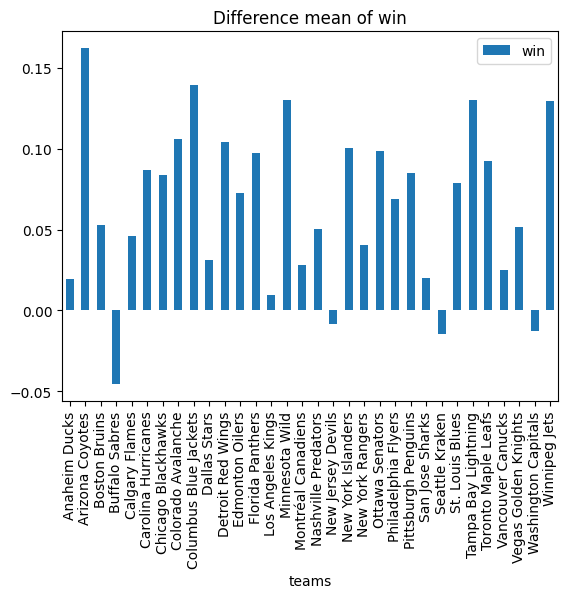

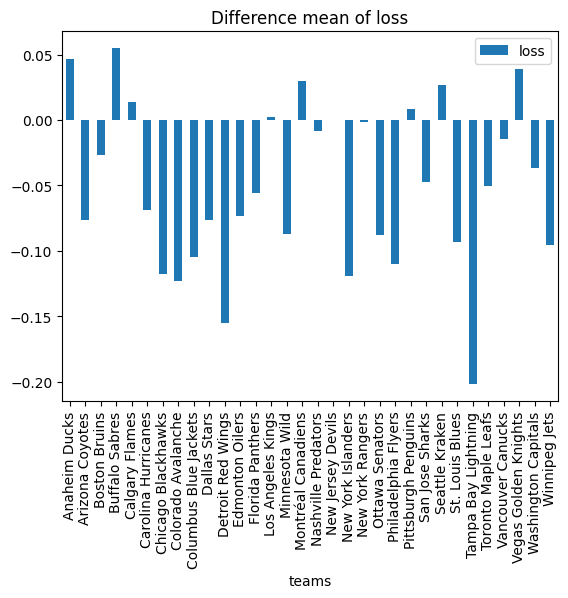

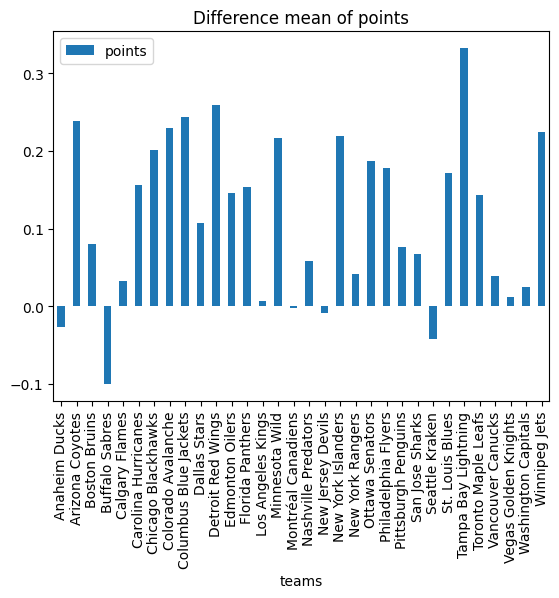

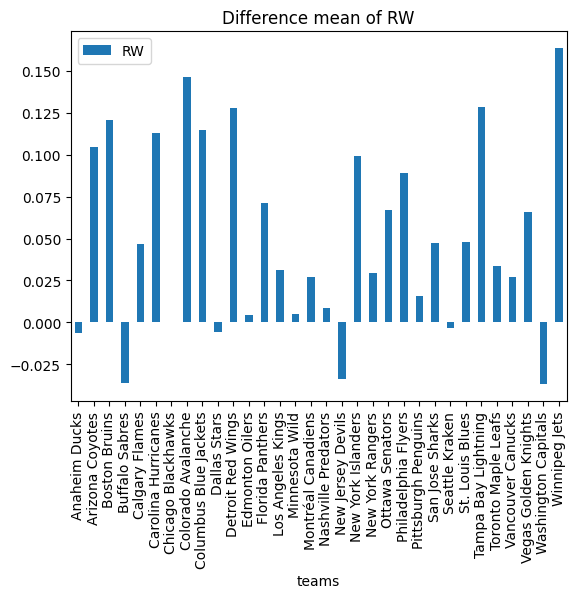

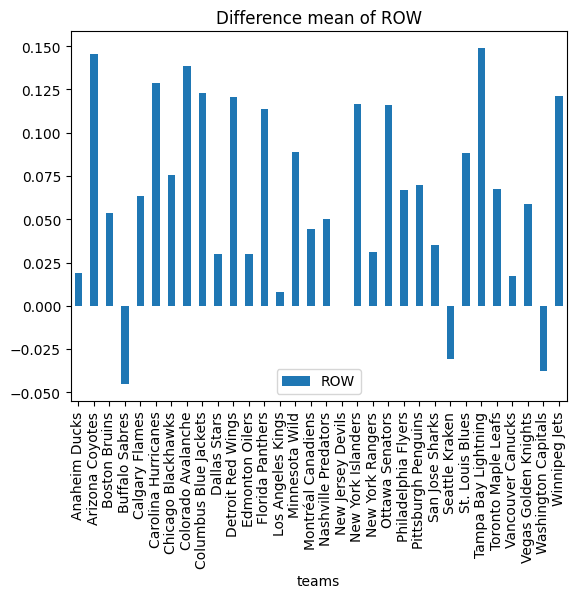

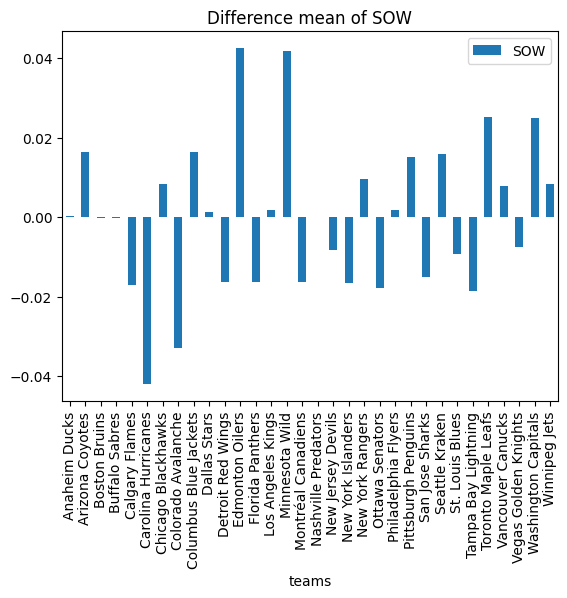

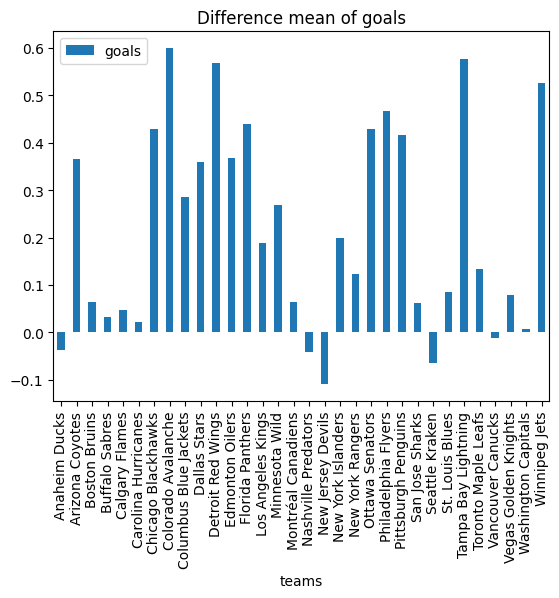

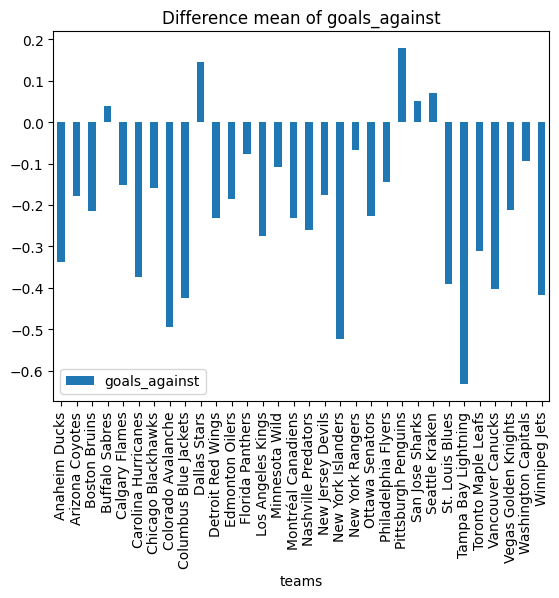

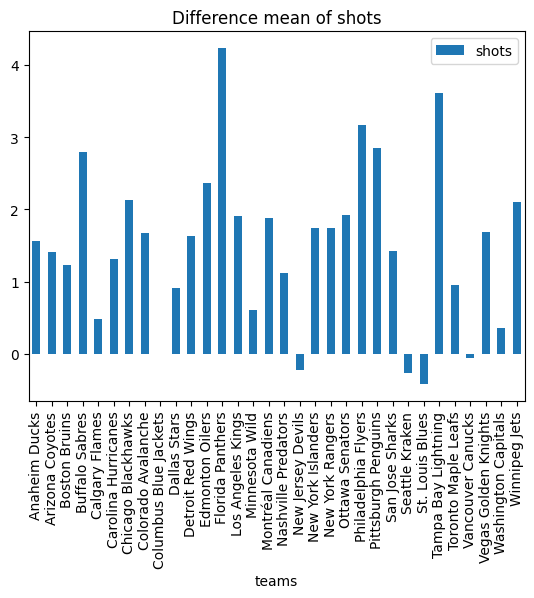

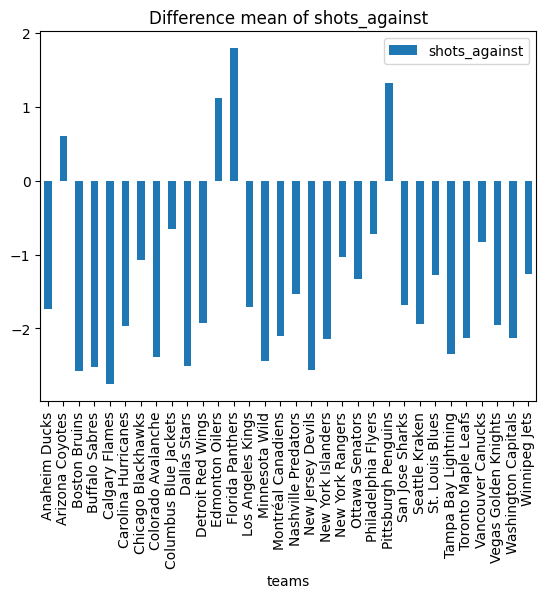

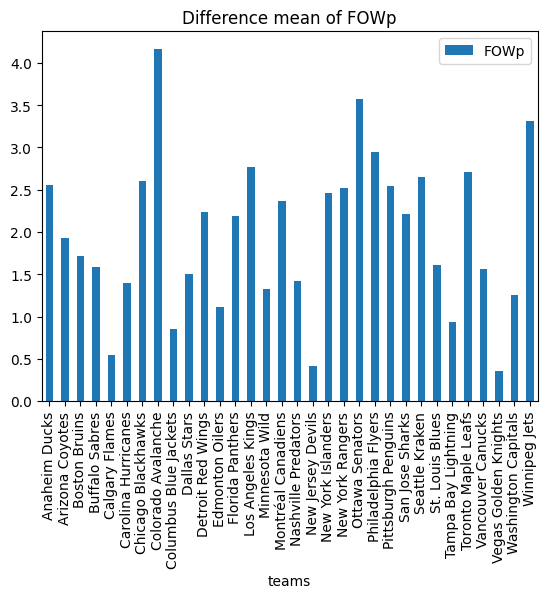

In [29]:
for i in range(len(num_columns)):
    mean_difference_df.plot.bar(x='teams', y=num_columns[i], title="Difference mean of " + num_columns[i])
    plt.show(block=True)